
# 🌾 Week 2 — NumPy 入门 + 光谱数据结构分析（Python + 英中双语）

---

## 🎯 学习目标 / Learning Objectives
- 理解 NumPy 的基本概念与数组结构  
  *Understand NumPy basics and array structures.*  
- 学会读取 `.mat` 格式的高光谱数据  
  *Learn to read hyperspectral `.mat` datasets.*  
- 分析高光谱数据的维度结构（行、列、波段）  
  *Analyze the structure of hyperspectral data (rows, columns, bands).*

---



## 🧩 Part 1 — NumPy 基础 / NumPy Basics
NumPy 是 Python 科学计算的核心库。我们先学习数组的创建、索引与运算。


In [1]:

import numpy as np

# 创建一个简单数组 / Create a simple array
arr = np.array([[1, 2, 3], [4, 5, 6]])
print("数组内容 / Array content:\n", arr)

# 查看维度信息 / Check array shape and dimension
print("形状 / Shape:", arr.shape)
print("维度数 / Dimension:", arr.ndim)
print("数据类型 / Data type:", arr.dtype)

# 数组的切片 / Array slicing
print("第二行 / Second row:", arr[1])
print("第1列 / First column:", arr[:, 0])


数组内容 / Array content:
 [[1 2 3]
 [4 5 6]]
形状 / Shape: (2, 3)
维度数 / Dimension: 2
数据类型 / Data type: int64
第二行 / Second row: [4 5 6]
第1列 / First column: [1 4]



## 🧠 练习 1 / Exercise 1
1. 创建一个 3×3 的随机矩阵，并计算其转置。  
   *Create a 3×3 random matrix and compute its transpose.*  
2. 将矩阵的所有元素减去其均值。  
   *Subtract the mean from all elements in the matrix.*


In [7]:
import numpy as np

arr = np.random.random((3, 3))
print("随机矩阵 / Random matrix:\n", arr)

print("转置矩阵 / Transposed matrix:\n")
print(arr.T)

mean_val = np.mean(arr)
arr_centered = arr - mean_val
print("中心化矩阵 / Centered matrix:\n", arr_centered)

随机矩阵 / Random matrix:
 [[0.80197207 0.95712504 0.16846164]
 [0.98766281 0.37015916 0.19610385]
 [0.92424274 0.37764909 0.63320697]]
转置矩阵 / Transposed matrix:

[[0.80197207 0.98766281 0.92424274]
 [0.95712504 0.37015916 0.37764909]
 [0.16846164 0.19610385 0.63320697]]
中心化矩阵 / Centered matrix:
 [[ 0.20012947  0.35528244 -0.43338096]
 [ 0.38582022 -0.23168344 -0.40573875]
 [ 0.32240014 -0.2241935   0.03136437]]



## 🌈 Part 2 — 读取高光谱数据 / Reading Hyperspectral Data
使用 `scipy.io.loadmat()` 函数来加载 `.mat` 文件中的数据。


In [24]:

from scipy.io import loadmat

# 示例: 读取 Indian Pines 数据（假设文件存在）
data = loadmat('../../data/Indian_pines_corrected.mat')
print("键列表 / Keys:", data.keys())

# 获取数据矩阵 / Extract data matrix
cube = data['indian_pines_corrected']
print("数据形状 / Data shape:", cube.shape)  # (145, 145, 200)


键列表 / Keys: dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])
数据形状 / Data shape: (145, 145, 200)



### 🧭 数据结构说明 / Data Structure Explanation
高光谱数据通常是一个三维立方体：  
`(height, width, bands)`  
例如 `(145, 145, 200)` 表示 145×145 的空间分辨率，200 个光谱波段。

---



## 📊 Part 3 — 可视化与波段分析 / Visualization and Band Analysis


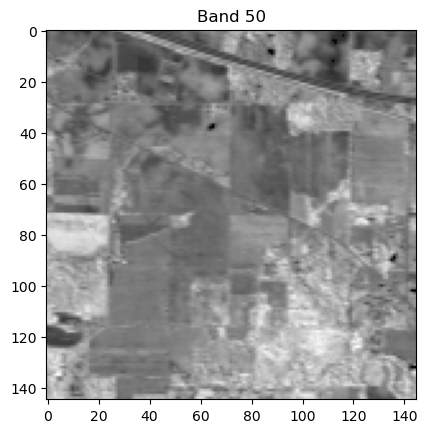

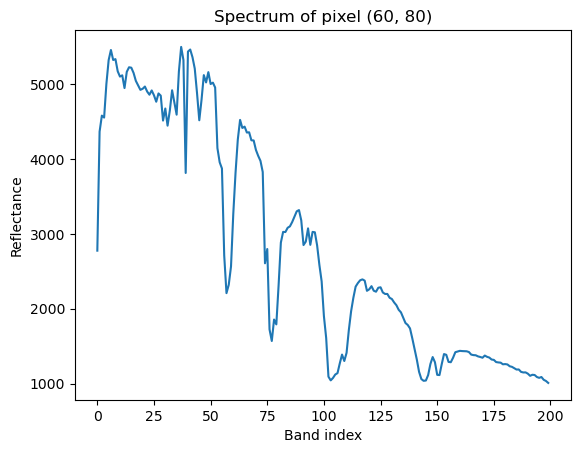

In [9]:

import matplotlib.pyplot as plt

# 显示某个波段 / Display a single spectral band
band_id = 50
plt.imshow(cube[:, :, band_id], cmap='gray')
plt.title(f"Band {band_id}")
plt.show()

# 查看像素的光谱曲线 / Plot the spectral curve of a pixel
x, y = 60, 80
spectrum = cube[x, y, :]
plt.plot(spectrum)
plt.title(f"Spectrum of pixel ({x}, {y})")
plt.xlabel("Band index")
plt.ylabel("Reflectance")
plt.show()



## 🧠 练习 2 / Exercise 2
1. 尝试显示不同波段的图像（如 Band 10, 50, 100）。  
   *Try visualizing different bands (e.g., Band 10, 50, 100).*  
2. 随机选取多个像素，比较它们的光谱曲线。  
   *Compare spectral curves of multiple randomly selected pixels.*

---



## 🧩 Part 4 — 数据统计与归一化 / Data Normalization


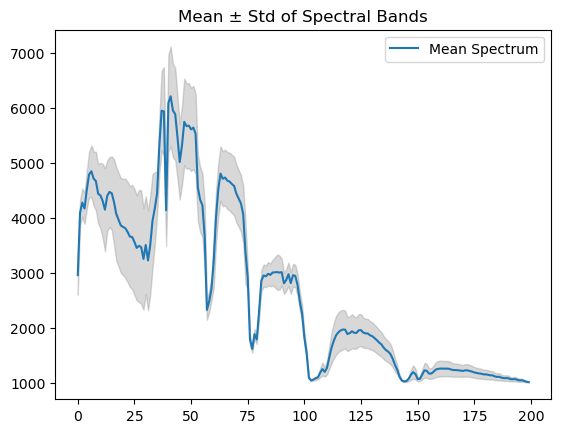

归一化后范围 / Normalized range: 0.0 1.0


In [17]:

# 计算每个波段的均值和标准差 / Compute mean & std for each band
mean_spectrum = np.mean(cube, axis=(0, 1))
std_spectrum = np.std(cube, axis=(0, 1))

plt.plot(mean_spectrum, label='Mean Spectrum')
plt.fill_between(range(len(mean_spectrum)),
                 mean_spectrum - std_spectrum,
                 mean_spectrum + std_spectrum,
                 color='gray', alpha=0.3)
plt.title("Mean ± Std of Spectral Bands")
plt.legend()
plt.show()

# 数据归一化 / Normalize data
cube_norm = (cube - np.min(cube)) / (np.max(cube) - np.min(cube))
print("归一化后范围 / Normalized range:", cube_norm.min(), cube_norm.max())



## 🧠 练习 3 / Exercise 3
1. 分别计算 Band 10、Band 100 的像素均值。  
   *Compute the pixel mean of Band 10 and Band 100.*  
2. 尝试用不同归一化方法（如每波段归一化）。  
   *Try band-wise normalization.*

---

✅ **小结 / Summary**
- 熟悉 NumPy 的核心操作。  
- 理解 `.mat` 高光谱数据的结构。  
- 能进行简单的数据可视化与归一化。  
---


In [18]:
mean_spectrum_band10 = np.mean(cube[:, :, 10])
mean_spectrum_band100 = np.mean(cube[:, :, 100])
print("Band 10 均值 / Mean of Band 10:", mean_spectrum_band10)
print("Band 100 均值 / Mean of Band 100:", mean_spectrum_band100)

Band 10 均值 / Mean of Band 10: 4407.192580261593
Band 100 均值 / Mean of Band 100: 1823.7354577883473


In [22]:
# 每波段归一化
cube_bandwise_norm = (cube - np.min(cube, axis=(0, 1), keepdims=True)) / (np.max(cube, axis=(0, 1), keepdims=True) - np.min(cube, axis=(0, 1), keepdims=True))
print("每波段归一化后范围 / Band-wise normalized range:", cube_bandwise_norm.min(), cube_bandwise_norm.max())

# 每像素归一化
cube_pixelwise_norm = (cube - np.min(cube, axis=2, keepdims=True)) / (np.max(cube, axis=2, keepdims=True) - np.min(cube, axis=2, keepdims=True))
print("每像素归一化后范围 / Pixel-wise normalized range:", cube_pixelwise_norm.min(), cube_pixelwise_norm.max())

每波段归一化后范围 / Band-wise normalized range: 0.0 1.0
每像素归一化后范围 / Pixel-wise normalized range: 0.0 1.0


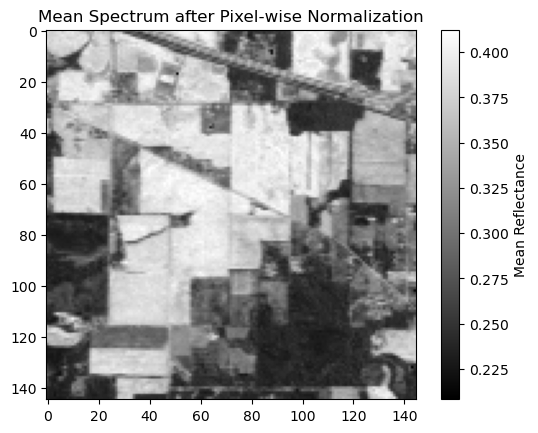

In [23]:
# 每像素平均值
mean_spectrum_pixelwise = np.mean(cube_pixelwise_norm, axis=2)
plt.imshow(mean_spectrum_pixelwise, cmap='gray')
plt.title("Mean Spectrum after Pixel-wise Normalization")
plt.colorbar(label='Mean Reflectance')
plt.show()

## 🌈 四、高光谱成像原理 / Hyperspectral Imaging Principles

高光谱成像系统通过将电磁波（通常在 400–2500 nm）分解成数百个窄波段，
测量目标在各波段的**反射率（Reflectance）**。
反射率受材料属性影响，因此可以用于区分不同地物。

🧩 **关键概念 / Key Concepts:**
| 概念 | 英文 | 说明 |
|------|------|------|
| 光谱波段 | Spectral Band | 单个波长区间的响应（如 10nm 宽） |
| 反射率 | Reflectance | 反射光与入射光能量比 |
| 噪声 | Noise | 传感器误差、气候等因素导致的干扰 |

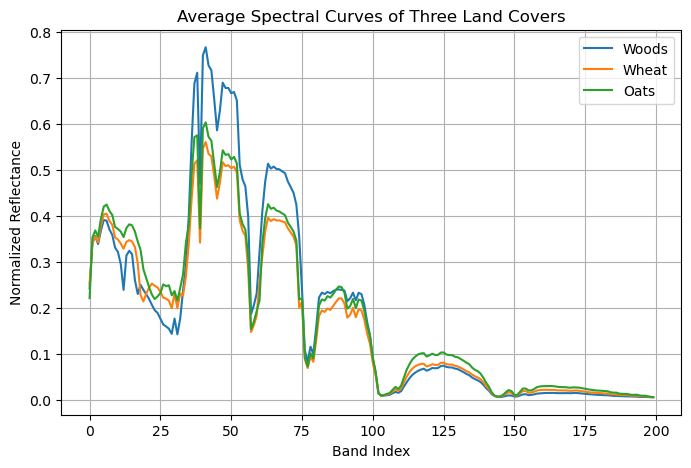

In [47]:
gt = loadmat('../../data/Indian_pines_gt.mat')['indian_pines_gt']

# 三类地物标签
classes = {'Woods': 14, 'Wheat': 13, 'Oats': 9}

avg_spectra = {}

for name, label in classes.items():
    mask = (gt == label)
    spectra = cube_norm[mask, :]
    avg_spectra[name] = np.mean(spectra, axis=0)

# 绘制平均光谱曲线 / Plot mean spectra
plt.figure(figsize=(8,5))
for name, spec in avg_spectra.items():
    plt.plot(spec, label=name)

plt.xlabel('Band Index')
plt.ylabel('Normalized Reflectance')
plt.title('Average Spectral Curves of Three Land Covers')
plt.legend()
plt.grid(True)
plt.show()


- 索引原理：使用布尔数组 m 对三维数组 a 进行索引
- 广播机制：m 的形状 (3,2) 会与 a 的前两维 (3,2) 自动广播
- 具体过程：
    1. m 中为 True 的位置对应 a 的第一维和第二维
    2. 每个 True 位置选取对应的三维数组中的第三维数据
    3. 最终选取结果是一维数组（3个元素）

In [46]:
a = np.array([[[1, 2, 3], [4, 5, 6]],
              [[1, 2, 3], [4, 5, 6]],
              [[1, 2, 3], [4, 5, 6]]])
print(a.shape)

b = np.array([[1,2], [1, 2], [1, 2]])
print(b.shape)
c = 1
m = b == c
print(m)

print(a[m, :])

(3, 2, 3)
(3, 2)
[[ True False]
 [ True False]
 [ True False]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
